### Importing Liberaries & Cleanning The Dataset

In [171]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [172]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [173]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Content Type Analysis
    -   6. Seasonal Analysis
    -   7. Correlation Analysis

#### 2. Release Date Analysis
- 
    

In [174]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show


In [176]:
# Convert the 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year, month, and day from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 8166 non-null   float64       
 7   Month                8166 non-null   float64       
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.7+ MB


In [177]:
df['Year'].isna().sum()

16646

In [222]:
# convert the Year column to an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Convert the Month column to an integer
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


In [227]:
# Group the data by year and count the number of movies released each year
df_release_date = df.groupby('Year').size().reset_index(name='Count')

df_release_date

,Year,Count
0,0,16646
1,2010,16
2,2011,6
3,2012,2
4,2013,21
5,2014,49
6,2015,147
7,2016,336
8,2017,596
9,2018,974


- ### Note:
    -  In the dataset, was fount 16646 titles without the release date.

    -  The large number of missing values (16646) in the release date poses a challenge in understanding the complete picture of Netflix's content release history. Here are some potential reasons for these missing values:

        -   The data collection process might have had limitations or inconsistencies, leading to missing or incomplete information.

        -   Some content types might have less defined release dates, such as documentaries or stand-up specials, making it difficult to accurately record their release dates.

        -   Netflix might not have released the exact release dates for all its content due to privacy concerns or contractual agreements with content creators.

        -   Human error during data entry could have resulted in missing or incorrect release dates.

In [228]:
# Drop the first row as it contains the value 0
df_release_date = df_release_date.drop([0])

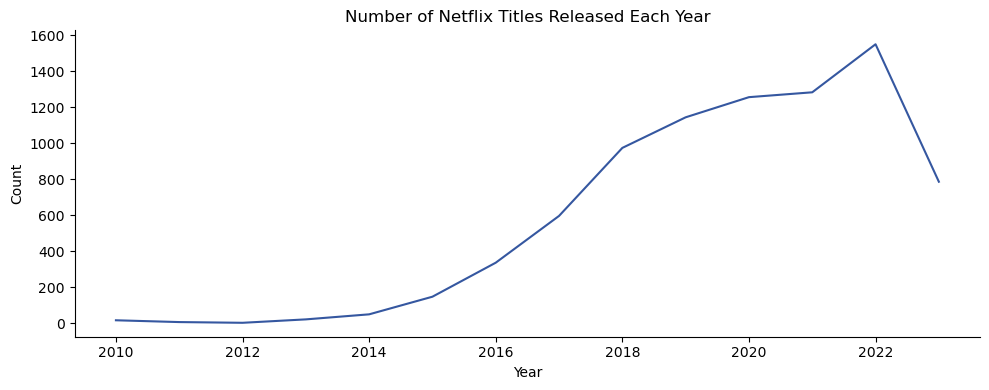

In [229]:
plt.figure(figsize=(10, 4))

sns.lineplot(data=df_release_date, 
             x='Year', 
             y='Count', 
             marker='', 
             color='#3557A0'
             
             )

plt.title('Number of Netflix Titles Released Each Year')



sns.despine()
plt.tight_layout()
plt.show()

In [230]:
monthly_viewership = df.groupby('Month')['Hours Viewed'].sum().to_frame()

monthly_viewership

,Hours Viewed
Month,
0,6.757390e+10
1,7.271600e+09
2,7.103700e+09
3,7.437100e+09
4,6.865700e+09
5,7.094600e+09
6,8.522000e+09
7,6.524800e+09
8,6.817800e+09
